In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [4]:
# Step 2: Load Dataset
# Source: The dataset is fetched from the scikit-learn dataset library (California Housing dataset).
# This dataset contains information about various housing features and the median house price.
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [6]:
# Step 3: Split Data into Training and Testing Sets
# We split the dataset into 80% training data and 20% testing data.
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Implement Regression Models and Evaluate using Mean Squared Error (MSE)
# MSE is chosen as the evaluation metric because it measures the average squared difference 
# between actual and predicted values, making it sensitive to large errors.
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree=2)': Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('lin_reg', LinearRegression())
    ]),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name}: Mean Squared Error = {mse:.4f}")

Linear Regression: Mean Squared Error = 0.5559
Polynomial Regression (Degree=2): Mean Squared Error = 0.4643
SVR: Mean Squared Error = 1.3320
Decision Tree: Mean Squared Error = 0.4952
Random Forest: Mean Squared Error = 0.2554
Ridge Regression: Mean Squared Error = 0.5558
Lasso Regression: Mean Squared Error = 0.9380


In [ ]:
# Step 6: Hyperparameter Tuning
# To optimize model performance, we use GridSearchCV for hyperparameter tuning.
# This systematically tests different hyperparameter values to find the best configuration.
param_grid = {
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 1, 10]}
}

for name, params in param_grid.items():
    grid_search = GridSearchCV(models[name], param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_mse = mean_squared_error(y_test, best_model.predict(X_test))
    results[name + ' (Tuned)'] = best_mse
    print(f"{name} (Tuned): Mean Squared Error = {best_mse:.4f}")

In [10]:
# Step 8: Comparison & Conclusion
# Determine which model performed the best based on the lowest MSE value.
best_model_name = min(results, key=results.get)
best_mse_value = results[best_model_name]
print(f"The best performing model is: {best_model_name} with MSE = {best_mse_value:.4f}")


The best performing model is: Random Forest with MSE = 0.2554


In [ ]:
# Discussion: 
# The model with the lowest MSE is considered the best because it has the smallest average error.
# Typically, Random Forest performs well due to its ensemble learning technique, reducing overfitting.
# However, if a simpler model (e.g., Ridge or Lasso) achieves similar results, it might be preferable for interpretability and efficiency.

1. Convolutional Neural Networks (CNNs) (15%)

In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ------------- -------------------------- 136.2/390.3 MB 3.7 MB/s eta 0:01:09
   ------------- -------------------------- 136.3/390.3 MB 3.6 MB/s eta 0:01:11
   ------------- -------------------------- 136.4/390.3 MB 3.6 MB/s eta 0:01:11
   ------------- -------------------------- 136.5/390.3 MB 3.6 MB/s eta 0:01:12
   -------------- ------------------------- 136.8/390.3 MB 3.5 MB/s eta 0:01:12
   -------------- ------------------------- 137.0/390.3 MB 3.5 MB/s eta 0:01:12
   -------------- ------------------------- 137.2/390.3 MB 3.5 MB/s eta 0:01:12
   -------------- ------------------------- 137.4/390.3 MB 3.5 MB/s eta 0:01:12
   -------------- ------------------------- 137.7/390.3 MB 3.6 MB/s eta 0:01:11
   -------------- ------------------------- 137.9/390.3 MB 3.6 MB/s eta 0:01:11
   -------------- ------------------------- 138.0/390.3 MB 3.6 MB/s eta 0:01:10
   -------------- ------------------------- 138.1/390.3 MB 3.6 MB/s eta 0:01:11
   -------------- ----------------------

In [6]:
# : Implementing a CNN for MNIST Image Classification using TensorFlow/Keras

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [8]:
# Loading and preprocessing MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [10]:
# Normalizing pixel values to range [0,1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0


In [12]:
# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\rohit\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Training the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.8532 - loss: 0.4715 - val_accuracy: 0.9817 - val_loss: 0.0571
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9819 - loss: 0.0573 - val_accuracy: 0.9882 - val_loss: 0.0438
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9874 - loss: 0.0402 - val_accuracy: 0.9897 - val_loss: 0.0369
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9909 - loss: 0.0284 - val_accuracy: 0.9908 - val_loss: 0.0338
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9895 - val_loss: 0.0358


In [20]:
# Evaluating the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9884 - loss: 0.0321
Test Accuracy: 0.9916


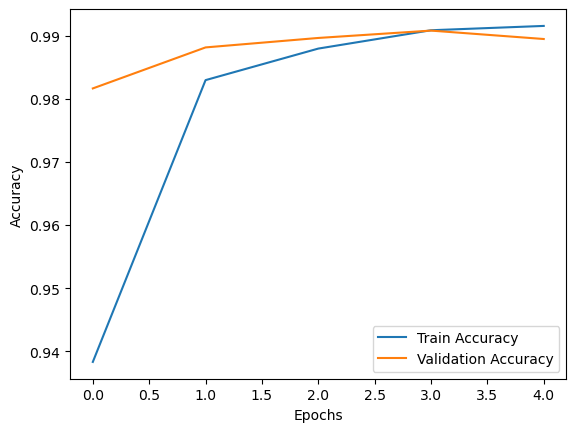

In [22]:
# Plotting training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2. Long Short-Term Memory Networks (LSTMs) (15%)

In [ ]:
"""
Step 2: Implementing a Simple LSTM for Time Series Forecasting

This script demonstrates how to build and train a Long Short-Term Memory (LSTM) network using TensorFlow/Keras 
for a sequence prediction task. We use a synthetic sine wave dataset to predict future values based on past observations.
"""

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [28]:
# Generate synthetic sine wave data
def generate_sine_wave(seq_length=1000, num_samples=100):
    x = np.linspace(0, seq_length, num_samples)
    y = np.sin(x)
    return y

In [30]:
# Prepare dataset for LSTM
def create_dataset(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [32]:
# Step 1: Load and preprocess data
data = generate_sine_wave()
time_steps = 10  # Number of past observations to consider
X, y = create_dataset(data, time_steps)
X = np.expand_dims(X, axis=-1)  # Reshape for LSTM input


In [34]:
# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [36]:
# Step 2: Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(time_steps, 1)),
    Dense(1)
])


C:\Users\rohit\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
# Compile the model
model.compile(optimizer='adam', loss='mse')


In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - loss: 0.4794 - val_loss: 0.4811
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5269 - val_loss: 0.4716
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4973 - val_loss: 0.4619
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.5097 - val_loss: 0.4521
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4366 - val_loss: 0.4423
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5003 - val_loss: 0.4309
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4364 - val_loss: 0.4182
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4433 - val_loss: 0.4025
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3890 - val_loss: 0.3846
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4072 - val_loss: 0.3633
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3683 - val_loss: 0.3380
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3523 - val_loss: 0.2963


In [42]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1187
Test Loss (MSE): 0.1187


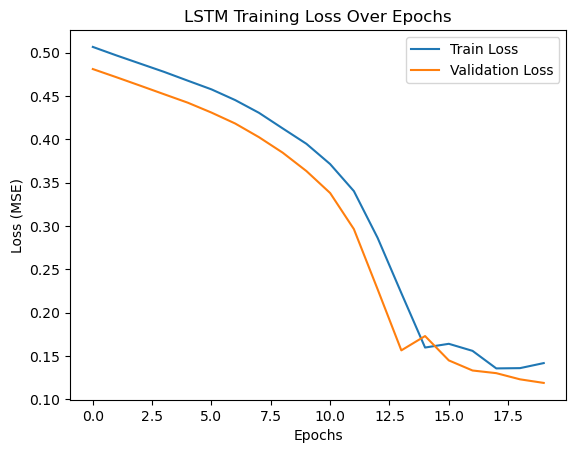

In [44]:
# Step 3: Visualize training performance
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('LSTM Training Loss Over Epochs')
plt.show()

In [46]:
# Step 4: Make predictions
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


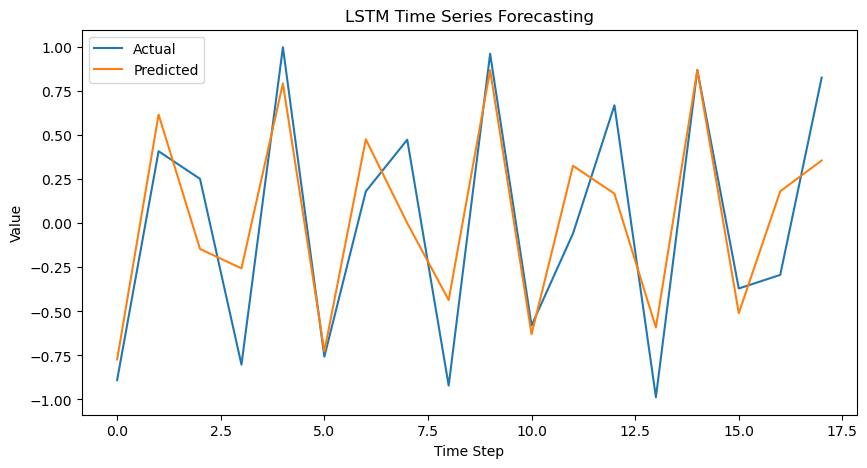

In [48]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.title('LSTM Time Series Forecasting')
plt.show()